# Introduction

The Adult Income dataset from the UCI repository of machine learning databases. In this dataset, the data was extracted from the 1984 census bureau database by Ronny Kohavi and Barry Becker. The dataset consists of attributes like age, gender, country of origin, marital status, education, employment, etc. Using these features, our goal is to predict whether a person’s income will exceed $50,000/year or not. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


First, we load the dataset, we found that there are 48882 rows, 14 feature column and 1 target variable i.e. whether a person more than $ 50K or less than $ 50K. We start with cleaning the data where we found out that there were no missing values, but when closely looking through the data we got to know that there were some irrelevant entries such as ‘?’ in some columns as shown in the snapshot below. 

## Reading the dataset

In [2]:
df = pd.read_csv('adult.csv')

In [97]:
df.shape

(48842, 15)

In [3]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## Cleaning the data

In [4]:
# A function to check the missing values and the data type of each column.
def eda(df):
    datatype = df.dtypes
    missing_values = df.isnull().sum()
    per_missing = (df.isnull().sum() / len(df))*100
    count_unique = list(df.nunique())
    v_len = len(df)
    dx = pd.DataFrame({'Total number of values': v_len, 'Total Missing Values': missing_values, 'Percentage missing': per_missing, ' Count of unique values': count_unique, 'Data type': datatype})
    return dx

This would have affected the prediction model, so we replaced “?” with null values and then replaced those null values with the mode of the respective columns.
After further analyzing the dataset we found some interesting insights.


In [5]:
eda(df)

,Total number of values,Total Missing Values,Percentage missing,Count of unique values,Data type
age,48842,0,0.0,74,int64
workclass,48842,0,0.0,9,object
fnlwgt,48842,0,0.0,28523,int64
education,48842,0,0.0,16,object
educational-num,48842,0,0.0,16,int64
marital-status,48842,0,0.0,7,object
occupation,48842,0,0.0,15,object
relationship,48842,0,0.0,6,object
race,48842,0,0.0,5,object
gender,48842,0,0.0,2,object


In [6]:
print(df.shape)
df.head()

(48842, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [7]:
df[df == '?'] = np.nan

In [8]:
eda(df)

,Total number of values,Total Missing Values,Percentage missing,Count of unique values,Data type
age,48842,0,0.000000,74,int64
workclass,48842,2799,5.730724,8,object
fnlwgt,48842,0,0.000000,28523,int64
education,48842,0,0.000000,16,object
educational-num,48842,0,0.000000,16,int64
marital-status,48842,0,0.000000,7,object
occupation,48842,2809,5.751198,14,object
relationship,48842,0,0.000000,6,object
race,48842,0,0.000000,5,object
gender,48842,0,0.000000,2,object


In [9]:
for col in ['workclass', 'occupation', 'native-country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [10]:
eda(df)

,Total number of values,Total Missing Values,Percentage missing,Count of unique values,Data type
age,48842,0,0.0,74,int64
workclass,48842,0,0.0,8,object
fnlwgt,48842,0,0.0,28523,int64
education,48842,0,0.0,16,object
educational-num,48842,0,0.0,16,int64
marital-status,48842,0,0.0,7,object
occupation,48842,0,0.0,14,object
relationship,48842,0,0.0,6,object
race,48842,0,0.0,5,object
gender,48842,0,0.0,2,object


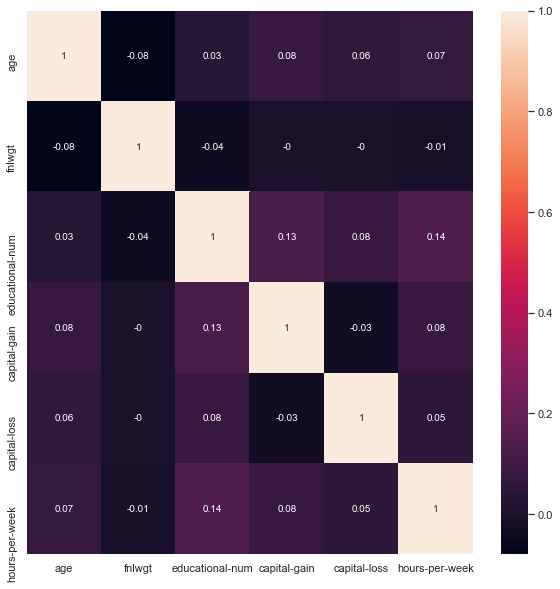

In [11]:
# checking the corellation between all the attributes
plt.figure(figsize = (10,10))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

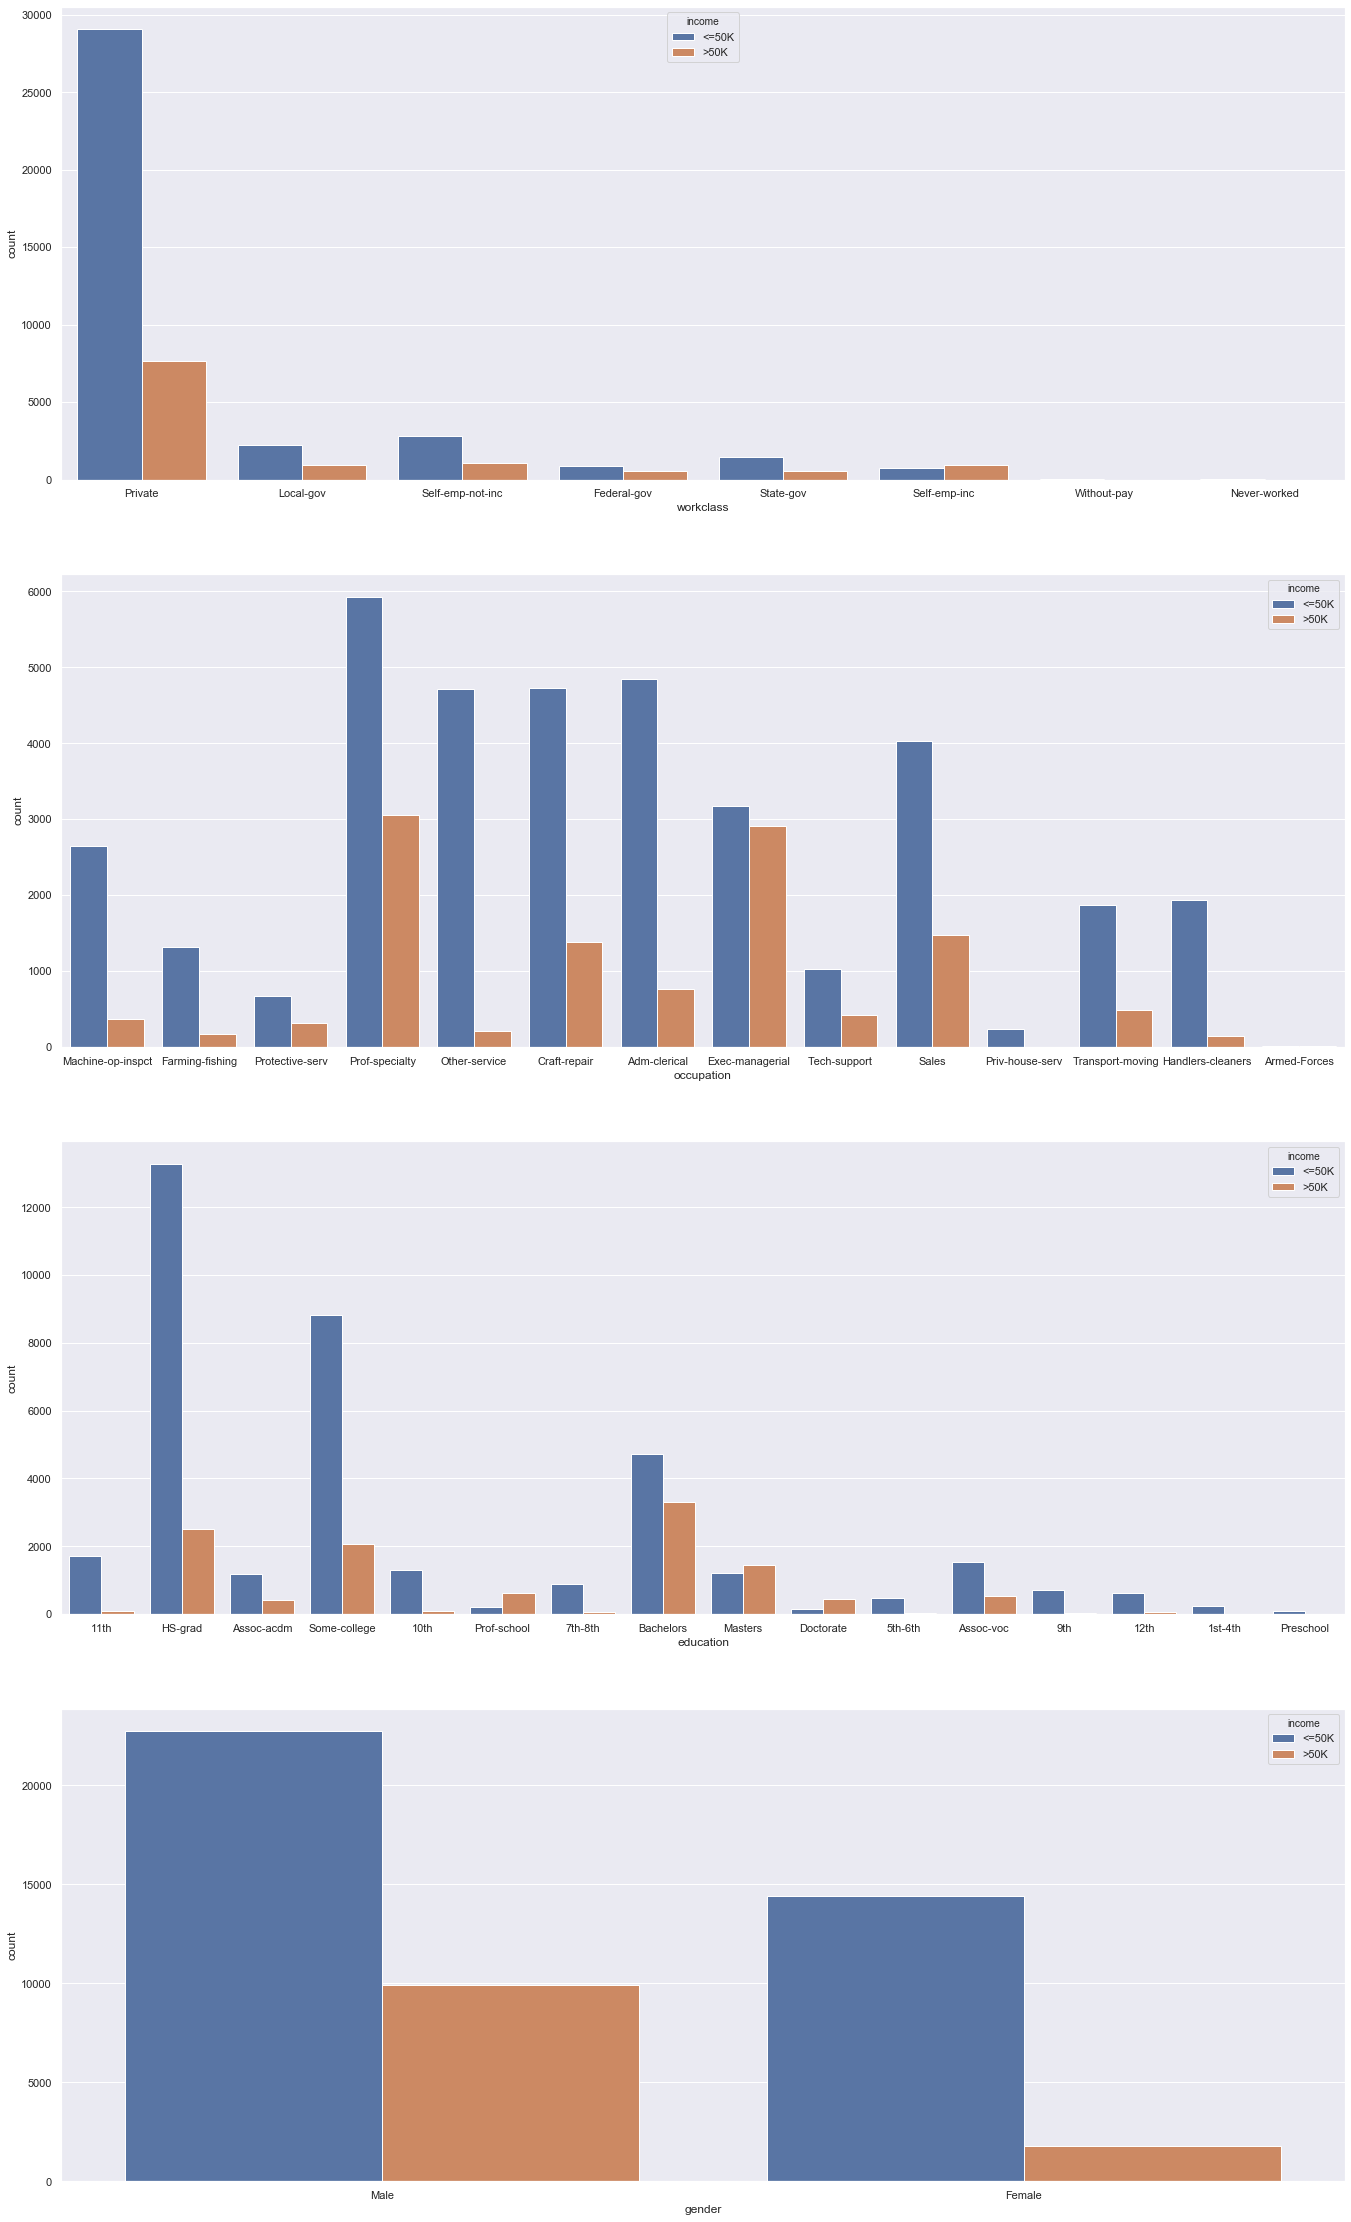

In [49]:
dim1 = (23, 40)
fig, ax = plt.subplots(figsize = dim1, nrows = 4)
sns.countplot(x = "workclass", hue = 'income', data = df, ax = ax[0])
sns.countplot(x = "occupation", hue = 'income', data = df, ax = ax[1])
sns.countplot(x = "education", hue = "income", data = df, ax = ax[2])
sns.countplot(x = "gender", hue = "income", data = df, ax = ax[3])

Here, we can see an interesting observation, only ‘prof-school’, ‘Masters’ and ‘Doctorate’ are the only education levels in which the count of >$50K is more than that of <$50K.

Here we can see that married people have more than $50. Another way we can say that people with higher income generally get settled and get married.

Here we can clearly see that the count of working men to women ratio, clearly there is a significant difference and we can also see that men having greater than $50K is almost thrice of that of women. 

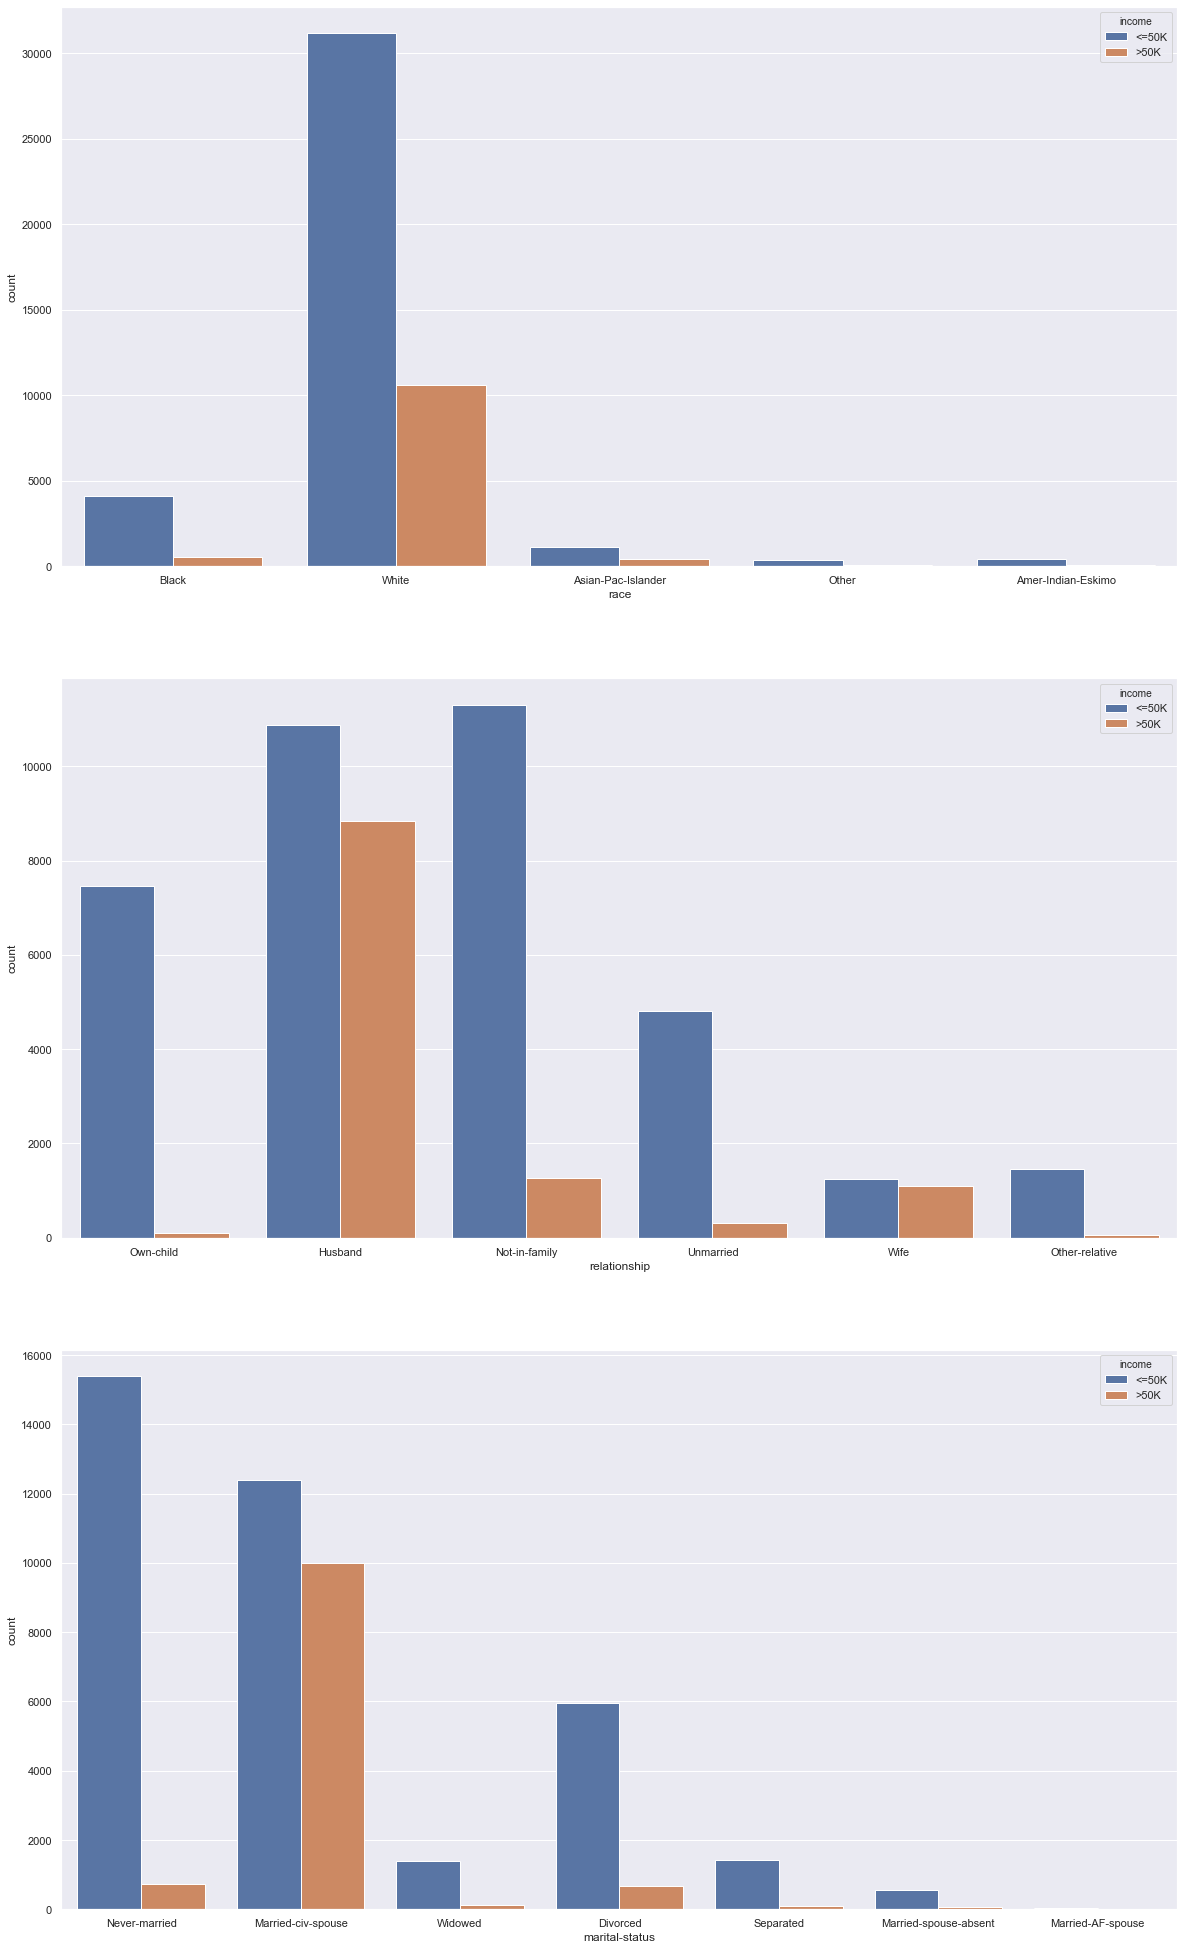

In [54]:
dim2 = (20, 35)
fig, ax = plt.subplots(figsize = dim2, nrows = 3)
sns.countplot(x = "race", hue = "income", data = df, ax = ax[0])
sns.countplot(x = "relationship", hue = "income", data = df, ax = ax[1])
sns.countplot(x = "marital-status", hue = "income", data = df, ax = ax[2])

In [13]:
x = df.drop(['income'], axis=1)

In [14]:
y = df['income']

In [15]:
xtrn, xtst, ytrn, ytst = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [16]:
categorical = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
for feature in categorical:
        lab = preprocessing.LabelEncoder()
        xtrn[feature] = lab.fit_transform(xtrn[feature])
        xtst[feature] = lab.transform(xtst[feature])

In [17]:
# Scaling the data
scaler = StandardScaler()

xtrn = pd.DataFrame(scaler.fit_transform(xtrn), columns = x.columns)

xtst = pd.DataFrame(scaler.transform(xtst), columns = x.columns)

In [18]:
xtrn.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,-1.288094,-0.093804,0.253001,1.213192,-0.028495,0.921520,1.225363,0.970558,0.391316,0.701453,-0.144174,-0.21611,-0.436408,0.258849
1,0.387077,-0.093804,-0.114223,1.213192,-0.028495,-1.734724,0.720291,1.593882,-4.365382,0.701453,-0.144174,-0.21611,0.770810,0.258849
2,-0.851093,-0.093804,-0.020037,0.182169,-0.417399,0.921520,0.215219,-0.276089,0.391316,-1.425611,-0.144174,-0.21611,-0.034002,0.258849
3,-0.268425,-0.093804,-1.302336,1.213192,-0.028495,0.921520,0.215219,-0.276089,0.391316,0.701453,-0.144174,-0.21611,-0.838814,0.258849
4,-1.069594,-0.093804,-0.340685,1.213192,-0.028495,0.921520,1.225363,0.970558,0.391316,-1.425611,-0.144174,-0.21611,-0.034002,0.258849


## Logistic Regression

In [19]:
# fitting the model
lg = LogisticRegression()
lg.fit(xtrn, ytrn)
ypred_lg = lg.predict(xtst)

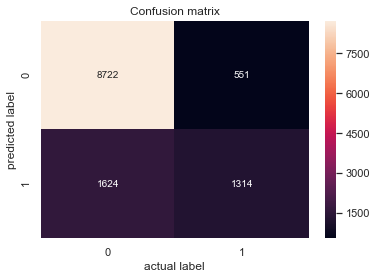

In [92]:
# confusion matrix
cm = confusion_matrix(ytst, ypred_lg)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.title('Confusion matrix')
plt.xlabel('actual label')
plt.ylabel('predicted label');

Logistic regression is a classification algorithm that is used when the dependent variable is in binary form. We used this algorithm to describe the relationship between the target variable i.e. income and the other features (independent variables) of the dataset. We split the dataset in train and test dataset in the ratio of 75% and 25% respectively. After applying the prediction model, we got an accuracy of 82% as shown below:

In [60]:
# accuracy
a_lg = accuracy_score(ytst, ypred_lg)
print('accuracy: %.2f%%' % (a_lg * 100.0))

accuracy: 82.19%


## Decision Tree

In [22]:
len(df)

48842

In [62]:
dt = df.copy()

In [63]:
# Create a new income_bi column
dt['income_bi'] = dt.apply(lambda row: 1 if '>50K'in row['income'] else 0, axis=1)

In [64]:
# Remove redundant columns
dt = dt.drop(['income','fnlwgt','capital-gain','capital-loss','native-country'], axis=1)

In [65]:
print(dt.shape)
dt.head()

(48842, 11)


,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,income_bi
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,1
4,18,Private,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,30,0


In [66]:
# Use one-hot encoding on categorial columns
dt = pd.get_dummies(dt, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race','gender'])

In [67]:
# shuffle rows
dt = dt.sample(frac=1)

# split training and testing data
d_train = dt[:35000]
d_test = dt[35000:]
d_train1 = d_train.drop(['income_bi'], axis=1)
d_train2 = d_train['income_bi']
d_test1 = d_test.drop(['income_bi'], axis=1)
d_test2 = d_test['income_bi']
d1 = dt.drop(['income_bi'], axis=1)
d2 = dt['income_bi']

# number of income > 50K in whole dataset:
print("Income >50K: %d out of %d (%.2f%%)" % (np.sum(d2), len(d2), 100*float(np.sum(d2)) / len(d2)))

Income >50K: 11687 out of 48842 (23.93%)


In [68]:
# Fit a decision tree
t = tree.DecisionTreeClassifier(criterion='entropy', max_depth=7)
t = t.fit(d_train1, d_train2)

In [69]:
# accuracy
a_dt = t.score(d_test1, d_test2)
print('accuracy: %.2f%%' % (a_dt * 100.0))

accuracy: 83.52%


In [70]:
for max_depth in range(1, 25):
    t = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    scores = cross_val_score(t, d1, d2, cv=5)
    print("Max depth: %d, Accuracy: %0.2f (+/- %0.2f)" % (max_depth, scores.mean(), scores.std()*2))

Max depth: 1, Accuracy: 0.76 (+/- 0.00)
Max depth: 2, Accuracy: 0.82 (+/- 0.01)
Max depth: 3, Accuracy: 0.82 (+/- 0.01)
Max depth: 4, Accuracy: 0.82 (+/- 0.01)
Max depth: 5, Accuracy: 0.82 (+/- 0.01)
Max depth: 6, Accuracy: 0.83 (+/- 0.01)
Max depth: 7, Accuracy: 0.83 (+/- 0.00)
Max depth: 8, Accuracy: 0.83 (+/- 0.01)
Max depth: 9, Accuracy: 0.83 (+/- 0.01)
Max depth: 10, Accuracy: 0.83 (+/- 0.01)
Max depth: 11, Accuracy: 0.83 (+/- 0.01)
Max depth: 12, Accuracy: 0.83 (+/- 0.01)
Max depth: 13, Accuracy: 0.83 (+/- 0.01)
Max depth: 14, Accuracy: 0.82 (+/- 0.01)
Max depth: 15, Accuracy: 0.82 (+/- 0.01)
Max depth: 16, Accuracy: 0.82 (+/- 0.01)
Max depth: 17, Accuracy: 0.82 (+/- 0.01)
Max depth: 18, Accuracy: 0.81 (+/- 0.01)
Max depth: 19, Accuracy: 0.81 (+/- 0.01)
Max depth: 20, Accuracy: 0.81 (+/- 0.01)
Max depth: 21, Accuracy: 0.81 (+/- 0.01)
Max depth: 22, Accuracy: 0.80 (+/- 0.01)
Max depth: 23, Accuracy: 0.80 (+/- 0.01)
Max depth: 24, Accuracy: 0.80 (+/- 0.00)


Here we removed some features like income, final-weight, capital-gain, capital-loss, native-country. When comparing the accuracy of different depths, we got to know that depth of 7 has the optimum result, so we obtained the accuracy of 83.52%

## Naive Bayes

In [32]:
nb = GaussianNB()
nb.fit(xtrn, ytrn)
ypred_nb = nb.predict(xtst)

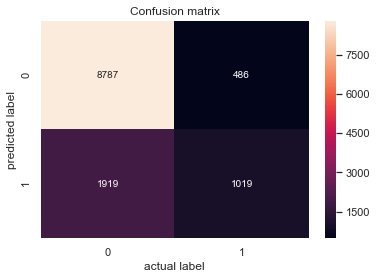

In [93]:
# confusion matrix
cm3 = confusion_matrix(ytst, ypred_nb)
sns.heatmap(cm3, annot = True, fmt = 'd')
plt.title('Confusion matrix')
plt.xlabel('actual label')
plt.ylabel('predicted label');

Naive Bayes algorithm is also used to classify data. It usually works better if the size of the data is big. We applied the Naive Bayes prediction model to our dataset and got an accuracy of 80.30% as shown below:

In [71]:
# accuracy
a_nb = accuracy_score(ytst, ypred_nb)
print('accuracy: %.2f%%' % (a_nb * 100.0))

accuracy: 80.30%


## Gradient Boosting

In [35]:
gb = GradientBoostingClassifier()
gb.fit(xtrn, ytrn)
ypred_gb = gb.predict(xtst)

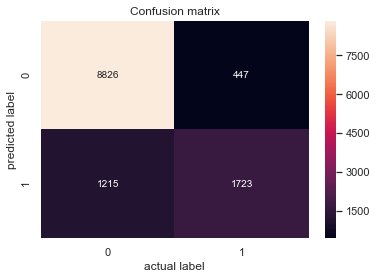

In [94]:
# confusion matrix
cm4 = confusion_matrix(ytst, ypred_gb)
sns.heatmap(cm4, annot = True, fmt = 'd')
plt.title('Confusion matrix')
plt.xlabel('actual label')
plt.ylabel('predicted label');

Gradient boosting is considered as one of the best classification models. Its best function is that it converts weak learners into strong learners. Each new decision tree is fitted on a new modified dataset. Here, it learns from its previous mistakes and corrects it. After applying gradient boosting on our dataset, we got an accuracy of 86.39%

In [72]:
# accuracy
a_gb = accuracy_score(ytst, ypred_gb)
print('accuracy: %.2f%%' % (a_gb * 100.0))

accuracy: 86.39%


## KNN

In [113]:
knn = KNeighborsClassifier(n_neighbors = 70)
knn.fit(xtrn, ytrn)
ypred_knn = knn.predict(xtst)

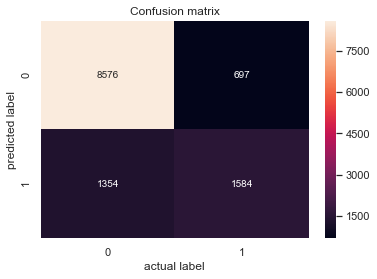

In [114]:
# confusion matrix
cm5 = confusion_matrix(ytst, ypred_knn)
sns.heatmap(cm5, annot = True, fmt = 'd')
plt.title('Confusion matrix')
plt.xlabel('actual label')
plt.ylabel('predicted label');

KNN is also a classification algorithm that determines what group a data point belongs to, by looking at the nearest data points. We got the highest accuracy on k = 30. We got an accuracy of 82.93% using the KNN prediction model.

In [115]:
# accuracy
a_knn = accuracy_score(ytst, ypred_knn)
print('accuracy: %.2f%%' % (a_knn * 100.0))

accuracy: 83.20%


## Random Forest Classifier

In [41]:
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(xtrn,ytrn)
ypred_rf = rf.predict(xtst)

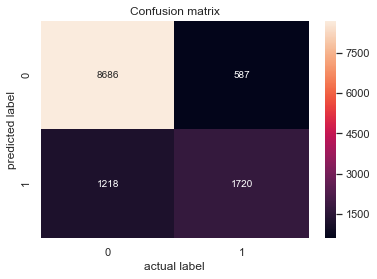

In [96]:
# confusion matrix
cm6 = confusion_matrix(ytst, ypred_rf)
sns.heatmap(cm6, annot = True, fmt = 'd')
plt.title('Confusion matrix')
plt.xlabel('actual label')
plt.ylabel('predicted label');

A random forest consists of a collection of simple tree predictors, each capable of producing a response. It consists of a certain number of trees, which are used to determine the final outcome. After applying the Random forest prediction model, we got an accuracy of 85.22%.

In [75]:
# accuracy
a_rf = accuracy_score(ytst, ypred_rf)
print('accuracy: %.2f%%' % (a_rf * 100.0))

accuracy: 85.22%


## Comparing accuracy of all the models

In [84]:
acc_list = [a_lg, a_dt, a_nb, a_gb, a_knn, a_rf]
models = ['Logistic', 'Decision Tree', 'Naive Bayes', 'Gradient Boosting', 'KNN', 'Random Forest']
n = np.arange(len(models))

We worked on several models to find out the best suiting model for the dataset. Ultimately the best performers were random forest and gradient boosting. Below is a plot of prediction models vs accuracy.

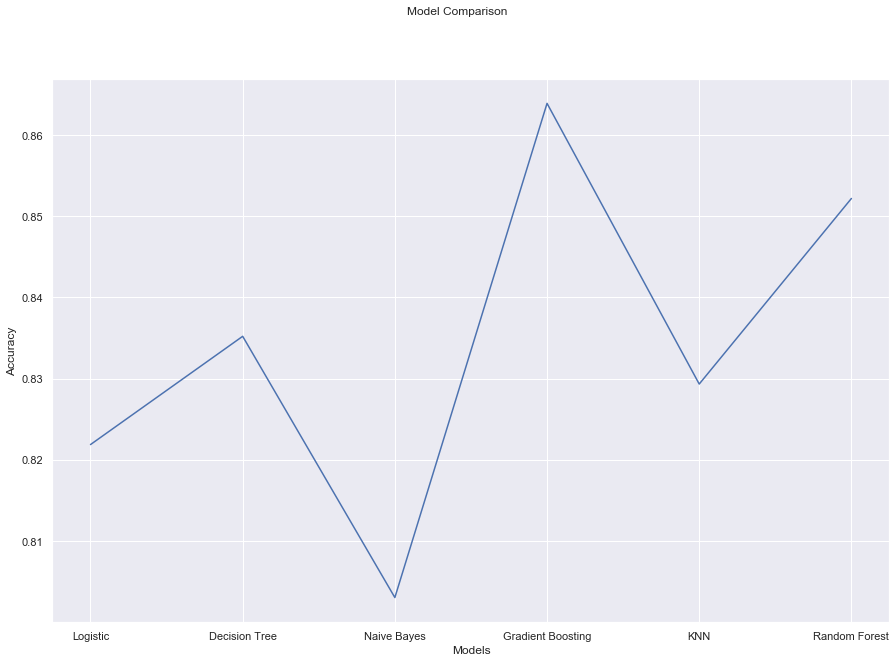

In [91]:
fig = plt.figure(figsize = (15,10))
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.xlabel("Models")
plt.ylabel("Accuracy");
plt.plot(acc_list)
plt.xticks(n, models)
plt.show()

We got the highest prediction accuracy from the gradient boosting model which is 86.39%. Hence, we can successfully predict whether a person is going to earn $50K/year or not.

Comparing all the classification models we can say that Gradient Boosting has the highest accuracy of 86.39%.
Hence, we can successfully predict from the data whether a person’s income exceeds $50,000 per year.